In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import logging
from sklearn import metrics


In [6]:
# Properties sold in 95131 for the past year
df95131sold = pd.read_csv("./95131 sold.csv")

df3 = df95131sold[["PROPERTY TYPE", "PRICE", "BEDS", "BATHS", "SQUARE FEET", "LOT SIZE", "YEAR BUILT", "$/SQUARE FEET", "HOA/MONTH"]]

df3 = df3[df3["PROPERTY TYPE"] != 'Mobile/Manufactured Home']

df3.dropna(subset=['BEDS', 'BATHS'], inplace=True)

df3["AGE OF HOME"] = 2020 - df3["YEAR BUILT"]

df3


,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME
0,Condo/Co-op,825000,2.0,2.0,1157.0,NaN,1993.0,713.0,265.0,27.0
1,Condo/Co-op,1025000,3.0,2.5,1790.0,915.0,1993.0,573.0,299.0,27.0
2,Condo/Co-op,1190000,3.0,3.5,1718.0,621.0,2015.0,693.0,275.0,5.0
3,Townhouse,1051000,4.0,3.0,2009.0,3200.0,1989.0,523.0,265.0,31.0
4,Townhouse,1040000,3.0,2.5,1666.0,2547.0,1989.0,624.0,265.0,31.0
...,...,...,...,...,...,...,...,...,...,...
214,Townhouse,960000,3.0,3.0,1536.0,645.0,2008.0,625.0,182.0,12.0
215,Condo/Co-op,930000,3.0,2.0,1546.0,1546.0,2006.0,602.0,320.0,14.0
216,Condo/Co-op,1250000,4.0,3.0,2036.0,NaN,2006.0,614.0,NaN,14.0
217,Townhouse,1115000,4.0,4.0,1573.0,784.0,2009.0,709.0,150.0,11.0


In [7]:
# Properties sold in 95132 for the past year
df95132sold = pd.read_csv("./95132 sold.csv")

df4 = df95132sold[["PROPERTY TYPE", "PRICE", "BEDS", "BATHS", "SQUARE FEET", "LOT SIZE", "YEAR BUILT", "$/SQUARE FEET", "HOA/MONTH"]]

df4 = df4[df4["PROPERTY TYPE"] != 'Vacant Land']

df4.dropna(subset=['BEDS', 'BATHS'], inplace=True)

df4["AGE OF HOME"] = 2020 - df4["YEAR BUILT"]

df4

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME
0,Townhouse,800000.0,4.0,2.5,1474.0,1055.0,1970.0,543.0,235.0,50.0
1,Condo/Co-op,810088.0,2.0,2.5,1450.0,1300.0,2014.0,559.0,210.0,6.0
2,Condo/Co-op,600000.0,2.0,1.0,884.0,1440.0,1971.0,679.0,230.0,49.0
4,Single Family Residential,1050000.0,4.0,2.0,1480.0,6307.0,1970.0,709.0,NaN,50.0
5,Single Family Residential,1072500.0,3.0,2.0,1372.0,6202.0,1971.0,782.0,NaN,49.0
...,...,...,...,...,...,...,...,...,...,...
245,Single Family Residential,1475000.0,4.0,2.5,2510.0,8001.0,1971.0,588.0,NaN,49.0
246,Condo/Co-op,595000.0,2.0,2.0,831.0,931.0,1988.0,716.0,330.0,32.0
247,Single Family Residential,1030000.0,5.0,3.0,1786.0,6099.0,1964.0,577.0,NaN,56.0
249,Single Family Residential,1025000.0,4.0,2.0,1659.0,5962.0,1967.0,618.0,NaN,53.0


In [63]:
# Training and Testing 95131 and 95132 Separately
dummies = pd.get_dummies(df3["PROPERTY TYPE"])
#df3 = pd.concat([df3, dummies], axis=1)
df3
train, test = train_test_split(df3, test_size=0.2)
train

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME,Condo/Co-op,Single Family Residential,Townhouse
68,Condo/Co-op,1165000,4.00,3.50,"1,851.00",574.00,"2,014.00",629.00,215.00,6.00,1,0,0
129,Condo/Co-op,490000,1.00,1.00,676.00,837.00,"1,986.00",725.00,421.00,34.00,1,0,0
206,Single Family Residential,1195000,4.00,2.00,"1,234.00","6,054.00","1,975.00",968.00,nan,45.00,0,1,0
50,Single Family Residential,1260000,3.00,2.50,"1,767.00","2,783.00","1,999.00",713.00,50.00,21.00,0,1,0
195,Townhouse,1130000,3.00,2.50,"1,651.00","1,306.00","1,996.00",684.00,297.00,24.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Condo/Co-op,557000,2.00,2.00,992.00,"1,131.00","1,986.00",561.00,496.00,34.00,1,0,0
140,Townhouse,850000,2.00,2.00,"1,098.00","1,845.00","1,988.00",774.00,421.00,32.00,0,0,1
179,Single Family Residential,1438000,4.00,2.50,"2,139.00","2,988.00","2,014.00",672.00,nan,6.00,0,1,0
183,Single Family Residential,1360000,6.00,2.00,"2,471.00","11,759.00","1,972.00",550.00,nan,48.00,0,1,0


In [64]:
X_train = train[["BEDS", "BATHS", "SQUARE FEET", "AGE OF HOME", "Condo/Co-op", "Single Family Residential", "Townhouse"]]
y_train = train["PRICE"]
X_test = test[["BEDS", "BATHS", "SQUARE FEET", "AGE OF HOME", "Condo/Co-op", "Single Family Residential", "Townhouse"]]
y_test = test["PRICE"]

X_train


,BEDS,BATHS,SQUARE FEET,AGE OF HOME,Condo/Co-op,Single Family Residential,Townhouse
68,4.00,3.50,"1,851.00",6.00,1,0,0
129,1.00,1.00,676.00,34.00,1,0,0
206,4.00,2.00,"1,234.00",45.00,0,1,0
50,3.00,2.50,"1,767.00",21.00,0,1,0
195,3.00,2.50,"1,651.00",24.00,0,0,1
...,...,...,...,...,...,...,...
59,2.00,2.00,992.00,34.00,1,0,0
140,2.00,2.00,"1,098.00",32.00,0,0,1
179,4.00,2.50,"2,139.00",6.00,0,1,0
183,6.00,2.00,"2,471.00",48.00,0,1,0


In [65]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[7])

In [66]:
model = tf.keras.Sequential([l0])

In [67]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [68]:
history = model.fit(X_train, y_train, epochs=3000, verbose=True)


Epoch 1/3000
152/152 [==============================] - 0s 957us/sample - loss: 1218713844035.3684
Epoch 2/3000
152/152 [==============================] - 0s 39us/sample - loss: 1216938018492.6316
Epoch 3/3000
152/152 [==============================] - 0s 39us/sample - loss: 1215149582443.7893
Epoch 4/3000
152/152 [==============================] - 0s 32us/sample - loss: 1213360470339.3684
Epoch 5/3000
152/152 [==============================] - 0s 35us/sample - loss: 1211560775895.5789
Epoch 6/3000
152/152 [==============================] - 0s 48us/sample - loss: 1209800816963.3684
Epoch 7/3000
152/152 [==============================] - 0s 47us/sample - loss: 1208061705377.6843
Epoch 8/3000
152/152 [==============================] - 0s 48us/sample - loss: 1206271392929.6843
Epoch 9/3000
152/152 [==============================] - 0s 56us/sample - loss: 1204498402681.2632
Epoch 10/3000
152/152 [==============================] - 0s 57us/sample - loss: 1202737084739.3684
Epoch 11/3000
152/

152/152 [==============================] - 0s 76us/sample - loss: 1078950087194.9474
Epoch 84/3000
152/152 [==============================] - 0s 58us/sample - loss: 1077310762792.4210
Epoch 85/3000
152/152 [==============================] - 0s 58us/sample - loss: 1075676229416.4210
Epoch 86/3000
152/152 [==============================] - 0s 78us/sample - loss: 1074079827644.6316
Epoch 87/3000
152/152 [==============================] - 0s 66us/sample - loss: 1072444952791.5790
Epoch 88/3000
152/152 [==============================] - 0s 63us/sample - loss: 1070848361310.3157
Epoch 89/3000
152/152 [==============================] - 0s 67us/sample - loss: 1069214807525.0526
Epoch 90/3000
152/152 [==============================] - 0s 48us/sample - loss: 1067625452597.8947
Epoch 91/3000
152/152 [==============================] - 0s 59us/sample - loss: 1065984458752.0000
Epoch 92/3000
152/152 [==============================] - 0s 61us/sample - loss: 1064411705128.4210
Epoch 93/3000
152/152 [=

152/152 [==============================] - 0s 50us/sample - loss: 951897089293.4738
Epoch 166/3000
152/152 [==============================] - 0s 53us/sample - loss: 950427534174.3157
Epoch 167/3000
152/152 [==============================] - 0s 72us/sample - loss: 948957316796.6316
Epoch 168/3000
152/152 [==============================] - 0s 43us/sample - loss: 947496250314.1053
Epoch 169/3000
152/152 [==============================] - 0s 62us/sample - loss: 946039033209.2632
Epoch 170/3000
152/152 [==============================] - 0s 46us/sample - loss: 944539421210.9474
Epoch 171/3000
152/152 [==============================] - 0s 73us/sample - loss: 943086546728.4210
Epoch 172/3000
152/152 [==============================] - 0s 58us/sample - loss: 941617884968.4210
Epoch 173/3000
152/152 [==============================] - 0s 60us/sample - loss: 940141838336.0000
Epoch 174/3000
152/152 [==============================] - 0s 60us/sample - loss: 938692368276.2106
Epoch 175/3000
152/152 [=

152/152 [==============================] - 0s 67us/sample - loss: 836432242795.7894
Epoch 248/3000
152/152 [==============================] - 0s 45us/sample - loss: 835102789847.5790
Epoch 249/3000
152/152 [==============================] - 0s 63us/sample - loss: 833752154974.3157
Epoch 250/3000
152/152 [==============================] - 0s 48us/sample - loss: 832427644820.2106
Epoch 251/3000
152/152 [==============================] - 0s 67us/sample - loss: 831103010492.6316
Epoch 252/3000
152/152 [==============================] - 0s 50us/sample - loss: 829761229877.8947
Epoch 253/3000
152/152 [==============================] - 0s 54us/sample - loss: 828453541780.2106
Epoch 254/3000
152/152 [==============================] - 0s 59us/sample - loss: 827106728690.5262
Epoch 255/3000
152/152 [==============================] - 0s 56us/sample - loss: 825765720710.7368
Epoch 256/3000
152/152 [==============================] - 0s 70us/sample - loss: 824418497158.7368
Epoch 257/3000
152/152 [=

152/152 [==============================] - 0s 56us/sample - loss: 731557572392.4210
Epoch 330/3000
152/152 [==============================] - 0s 61us/sample - loss: 730322253285.0526
Epoch 331/3000
152/152 [==============================] - 0s 50us/sample - loss: 729122685790.3158
Epoch 332/3000
152/152 [==============================] - 0s 60us/sample - loss: 727896455491.3684
Epoch 333/3000
152/152 [==============================] - 0s 47us/sample - loss: 726681987179.7894
Epoch 334/3000
152/152 [==============================] - 0s 55us/sample - loss: 725477949440.0000
Epoch 335/3000
152/152 [==============================] - 0s 52us/sample - loss: 724268134184.4210
Epoch 336/3000
152/152 [==============================] - 0s 48us/sample - loss: 723045567002.9474
Epoch 337/3000
152/152 [==============================] - 0s 48us/sample - loss: 721836486440.4210
Epoch 338/3000
152/152 [==============================] - 0s 50us/sample - loss: 720633604203.7894
Epoch 339/3000
152/152 [=

152/152 [==============================] - 0s 47us/sample - loss: 636520117733.0526
Epoch 412/3000
152/152 [==============================] - 0s 46us/sample - loss: 635436488596.2106
Epoch 413/3000
152/152 [==============================] - 0s 47us/sample - loss: 634337206703.1578
Epoch 414/3000
152/152 [==============================] - 0s 53us/sample - loss: 633224976276.2106
Epoch 415/3000
152/152 [==============================] - 0s 48us/sample - loss: 632126510133.8947
Epoch 416/3000
152/152 [==============================] - 0s 48us/sample - loss: 631024679235.3684
Epoch 417/3000
152/152 [==============================] - 0s 41us/sample - loss: 629951220250.9474
Epoch 418/3000
152/152 [==============================] - 0s 58us/sample - loss: 628844772513.6842
Epoch 419/3000
152/152 [==============================] - 0s 54us/sample - loss: 627755393455.1578
Epoch 420/3000
152/152 [==============================] - 0s 50us/sample - loss: 626645046325.8947
Epoch 421/3000
152/152 [=

152/152 [==============================] - 0s 45us/sample - loss: 550848397312.0000
Epoch 494/3000
152/152 [==============================] - 0s 49us/sample - loss: 549808315122.5262
Epoch 495/3000
152/152 [==============================] - 0s 41us/sample - loss: 548842507641.2631
Epoch 496/3000
152/152 [==============================] - 0s 49us/sample - loss: 547850972106.1053
Epoch 497/3000
152/152 [==============================] - 0s 47us/sample - loss: 546859562469.0527
Epoch 498/3000
152/152 [==============================] - 0s 46us/sample - loss: 545873281886.3158
Epoch 499/3000
152/152 [==============================] - 0s 46us/sample - loss: 544879250809.2631
Epoch 500/3000
152/152 [==============================] - 0s 45us/sample - loss: 543911810101.8947
Epoch 501/3000
152/152 [==============================] - 0s 46us/sample - loss: 542919677844.2105
Epoch 502/3000
152/152 [==============================] - 0s 51us/sample - loss: 541921812911.1578
Epoch 503/3000
152/152 [=

152/152 [==============================] - 0s 58us/sample - loss: 473727120869.0527
Epoch 576/3000
152/152 [==============================] - 0s 51us/sample - loss: 472835769182.3158
Epoch 577/3000
152/152 [==============================] - 0s 53us/sample - loss: 471942687690.1053
Epoch 578/3000
152/152 [==============================] - 0s 46us/sample - loss: 471070020661.8947
Epoch 579/3000
152/152 [==============================] - 0s 62us/sample - loss: 470163973389.4737
Epoch 580/3000
152/152 [==============================] - 0s 52us/sample - loss: 469297170108.6316
Epoch 581/3000
152/152 [==============================] - 0s 54us/sample - loss: 468400692816.8422
Epoch 582/3000
152/152 [==============================] - 0s 63us/sample - loss: 467503563614.3158
Epoch 583/3000
152/152 [==============================] - 0s 68us/sample - loss: 466638378037.8947
Epoch 584/3000
152/152 [==============================] - 0s 45us/sample - loss: 465754590585.2631
Epoch 585/3000
152/152 [=

152/152 [==============================] - 0s 79us/sample - loss: 404799643216.8422
Epoch 658/3000
152/152 [==============================] - 0s 63us/sample - loss: 404020923769.2631
Epoch 659/3000
152/152 [==============================] - 0s 57us/sample - loss: 403216631484.6316
Epoch 660/3000
152/152 [==============================] - 0s 54us/sample - loss: 402438771765.8947
Epoch 661/3000
152/152 [==============================] - 0s 60us/sample - loss: 401631833034.1053
Epoch 662/3000
152/152 [==============================] - 0s 58us/sample - loss: 400849038282.1053
Epoch 663/3000
152/152 [==============================] - 0s 43us/sample - loss: 400077544178.5263
Epoch 664/3000
152/152 [==============================] - 0s 52us/sample - loss: 399271291850.1053
Epoch 665/3000
152/152 [==============================] - 0s 43us/sample - loss: 398495328363.7895
Epoch 666/3000
152/152 [==============================] - 0s 39us/sample - loss: 397714047838.3158
Epoch 667/3000
152/152 [=

152/152 [==============================] - 0s 45us/sample - loss: 343588150002.5263
Epoch 740/3000
152/152 [==============================] - 0s 52us/sample - loss: 342909805837.4737
Epoch 741/3000
152/152 [==============================] - 0s 43us/sample - loss: 342212106132.2105
Epoch 742/3000
152/152 [==============================] - 0s 54us/sample - loss: 341505929000.4211
Epoch 743/3000
152/152 [==============================] - 0s 62us/sample - loss: 340796833792.0000
Epoch 744/3000
152/152 [==============================] - 0s 52us/sample - loss: 340110351090.5263
Epoch 745/3000
152/152 [==============================] - 0s 64us/sample - loss: 339411683866.9473
Epoch 746/3000
152/152 [==============================] - 0s 48us/sample - loss: 338715051708.6316
Epoch 747/3000
152/152 [==============================] - 0s 50us/sample - loss: 338036331573.8947
Epoch 748/3000
152/152 [==============================] - 0s 51us/sample - loss: 337337295279.1579
Epoch 749/3000
152/152 [=

152/152 [==============================] - 0s 39us/sample - loss: 289817910864.8421
Epoch 822/3000
152/152 [==============================] - 0s 58us/sample - loss: 289197247002.9473
Epoch 823/3000
152/152 [==============================] - 0s 44us/sample - loss: 288596350868.2105
Epoch 824/3000
152/152 [==============================] - 0s 56us/sample - loss: 287983519420.6316
Epoch 825/3000
152/152 [==============================] - 0s 50us/sample - loss: 287363209108.2105
Epoch 826/3000
152/152 [==============================] - 0s 42us/sample - loss: 286772690944.0000
Epoch 827/3000
152/152 [==============================] - 0s 57us/sample - loss: 286161435809.6842
Epoch 828/3000
152/152 [==============================] - 0s 44us/sample - loss: 285549513242.9473
Epoch 829/3000
152/152 [==============================] - 0s 53us/sample - loss: 284951431706.9473
Epoch 830/3000
152/152 [==============================] - 0s 50us/sample - loss: 284345226293.8947
Epoch 831/3000
152/152 [=

152/152 [==============================] - 0s 98us/sample - loss: 242989196557.4737
Epoch 904/3000
152/152 [==============================] - 0s 86us/sample - loss: 242469226172.6316
Epoch 905/3000
152/152 [==============================] - 0s 125us/sample - loss: 241944350073.2632
Epoch 906/3000
152/152 [==============================] - 0s 108us/sample - loss: 241402432889.2632
Epoch 907/3000
152/152 [==============================] - 0s 84us/sample - loss: 240877162711.5789
Epoch 908/3000
152/152 [==============================] - 0s 75us/sample - loss: 240355922135.5789
Epoch 909/3000
152/152 [==============================] - 0s 62us/sample - loss: 239819816960.0000
Epoch 910/3000
152/152 [==============================] - 0s 62us/sample - loss: 239317194644.2105
Epoch 911/3000
152/152 [==============================] - 0s 63us/sample - loss: 238782165638.7368
Epoch 912/3000
152/152 [==============================] - 0s 61us/sample - loss: 238252325187.3684
Epoch 913/3000
152/152 

152/152 [==============================] - 0s 64us/sample - loss: 202739208838.7368
Epoch 986/3000
152/152 [==============================] - 0s 60us/sample - loss: 202288950218.1053
Epoch 987/3000
152/152 [==============================] - 0s 60us/sample - loss: 201824314637.4737
Epoch 988/3000
152/152 [==============================] - 0s 57us/sample - loss: 201384350773.8947
Epoch 989/3000
152/152 [==============================] - 0s 70us/sample - loss: 200930076779.7895
Epoch 990/3000
152/152 [==============================] - 0s 49us/sample - loss: 200490339705.2632
Epoch 991/3000
152/152 [==============================] - 0s 65us/sample - loss: 200042495137.6842
Epoch 992/3000
152/152 [==============================] - 0s 52us/sample - loss: 199603580712.4211
Epoch 993/3000
152/152 [==============================] - 0s 48us/sample - loss: 199142238315.7895
Epoch 994/3000
152/152 [==============================] - 0s 62us/sample - loss: 198716046066.5263
Epoch 995/3000
152/152 [=

152/152 [==============================] - 0s 55us/sample - loss: 168754887841.6842
Epoch 1068/3000
152/152 [==============================] - 0s 62us/sample - loss: 168377222413.4737
Epoch 1069/3000
152/152 [==============================] - 0s 64us/sample - loss: 167985764244.2105
Epoch 1070/3000
152/152 [==============================] - 0s 58us/sample - loss: 167616168367.1579
Epoch 1071/3000
152/152 [==============================] - 0s 57us/sample - loss: 167251826580.2105
Epoch 1072/3000
152/152 [==============================] - 0s 57us/sample - loss: 166871375009.6842
Epoch 1073/3000
152/152 [==============================] - 0s 43us/sample - loss: 166496838063.1579
Epoch 1074/3000
152/152 [==============================] - 0s 45us/sample - loss: 166133553475.3684
Epoch 1075/3000
152/152 [==============================] - 0s 46us/sample - loss: 165757276375.5789
Epoch 1076/3000
152/152 [==============================] - 0s 44us/sample - loss: 165384835287.5789
Epoch 1077/3000


152/152 [==============================] - 0s 48us/sample - loss: 140664601330.5263
Epoch 1150/3000
152/152 [==============================] - 0s 60us/sample - loss: 140361045477.0526
Epoch 1151/3000
152/152 [==============================] - 0s 60us/sample - loss: 140055133130.1053
Epoch 1152/3000
152/152 [==============================] - 0s 56us/sample - loss: 139754858603.7895
Epoch 1153/3000
152/152 [==============================] - 0s 61us/sample - loss: 139440340560.8421
Epoch 1154/3000
152/152 [==============================] - 0s 63us/sample - loss: 139132326103.5789
Epoch 1155/3000
152/152 [==============================] - 0s 77us/sample - loss: 138844930479.1579
Epoch 1156/3000
152/152 [==============================] - 0s 80us/sample - loss: 138528276048.8421
Epoch 1157/3000
152/152 [==============================] - 0s 95us/sample - loss: 138226974720.0000
Epoch 1158/3000
152/152 [==============================] - ETA: 0s - loss: 72218640384.000 - 0s 104us/sample - loss:

152/152 [==============================] - 0s 60us/sample - loss: 118222395499.7895
Epoch 1231/3000
152/152 [==============================] - 0s 51us/sample - loss: 117987623989.8947
Epoch 1232/3000
152/152 [==============================] - 0s 61us/sample - loss: 117735755129.2632
Epoch 1233/3000
152/152 [==============================] - 0s 45us/sample - loss: 117488479178.1053
Epoch 1234/3000
152/152 [==============================] - 0s 51us/sample - loss: 117258897946.9474
Epoch 1235/3000
152/152 [==============================] - 0s 64us/sample - loss: 116998578607.1579
Epoch 1236/3000
152/152 [==============================] - 0s 56us/sample - loss: 116759786981.0526
Epoch 1237/3000
152/152 [==============================] - 0s 53us/sample - loss: 116527605005.4737
Epoch 1238/3000
152/152 [==============================] - 0s 52us/sample - loss: 116282145953.6842
Epoch 1239/3000
152/152 [==============================] - 0s 59us/sample - loss: 116036281397.8947
Epoch 1240/3000


Epoch 1312/3000
152/152 [==============================] - 0s 92us/sample - loss: 100437151097.2632
Epoch 1313/3000
152/152 [==============================] - 0s 90us/sample - loss: 100267291055.1579
Epoch 1314/3000
152/152 [==============================] - 0s 95us/sample - loss: 100066946640.8421
Epoch 1315/3000
152/152 [==============================] - 0s 65us/sample - loss: 99885116577.6842
Epoch 1316/3000
152/152 [==============================] - 0s 94us/sample - loss: 99683517709.4737
Epoch 1317/3000
152/152 [==============================] - 0s 115us/sample - loss: 99510634711.5789
Epoch 1318/3000
152/152 [==============================] - 0s 223us/sample - loss: 99328239292.6316
Epoch 1319/3000
152/152 [==============================] - 0s 161us/sample - loss: 99133539166.3158
Epoch 1320/3000
152/152 [==============================] - 0s 133us/sample - loss: 98946993744.8421
Epoch 1321/3000
152/152 [==============================] - 0s 94us/sample - loss: 98767803230.3158
Epo

152/152 [==============================] - 0s 74us/sample - loss: 87039423218.5263
Epoch 1395/3000
152/152 [==============================] - 0s 66us/sample - loss: 86898254255.1579
Epoch 1396/3000
152/152 [==============================] - 0s 64us/sample - loss: 86761650499.3684
Epoch 1397/3000
152/152 [==============================] - 0s 75us/sample - loss: 86615204810.1053
Epoch 1398/3000
152/152 [==============================] - 0s 74us/sample - loss: 86488759457.6842
Epoch 1399/3000
152/152 [==============================] - 0s 88us/sample - loss: 86354811634.5263
Epoch 1400/3000
152/152 [==============================] - 0s 66us/sample - loss: 86218585573.0526
Epoch 1401/3000
152/152 [==============================] - 0s 79us/sample - loss: 86085935966.3158
Epoch 1402/3000
152/152 [==============================] - 0s 67us/sample - loss: 85949948119.5789
Epoch 1403/3000
152/152 [==============================] - 0s 58us/sample - loss: 85815779974.7368
Epoch 1404/3000
152/152 [=

152/152 [==============================] - 0s 49us/sample - loss: 77499529539.3684
Epoch 1477/3000
152/152 [==============================] - 0s 52us/sample - loss: 77404055228.6316
Epoch 1478/3000
152/152 [==============================] - 0s 68us/sample - loss: 77310815070.3158
Epoch 1479/3000
152/152 [==============================] - 0s 60us/sample - loss: 77217300587.7895
Epoch 1480/3000
152/152 [==============================] - 0s 60us/sample - loss: 77123322610.5263
Epoch 1481/3000
152/152 [==============================] - 0s 61us/sample - loss: 77031633003.7895
Epoch 1482/3000
152/152 [==============================] - 0s 51us/sample - loss: 76932314058.1053
Epoch 1483/3000
152/152 [==============================] - 0s 86us/sample - loss: 76841723688.4211
Epoch 1484/3000
152/152 [==============================] - 0s 100us/sample - loss: 76750751528.4211
Epoch 1485/3000
152/152 [==============================] - 0s 61us/sample - loss: 76655806032.8421
Epoch 1486/3000
152/152 [

152/152 [==============================] - 0s 44us/sample - loss: 71097170243.3684
Epoch 1559/3000
152/152 [==============================] - 0s 62us/sample - loss: 71031005345.6842
Epoch 1560/3000
152/152 [==============================] - 0s 51us/sample - loss: 70970530277.0526
Epoch 1561/3000
152/152 [==============================] - 0s 70us/sample - loss: 70915744175.1579
Epoch 1562/3000
152/152 [==============================] - 0s 47us/sample - loss: 70860222571.7895
Epoch 1563/3000
152/152 [==============================] - 0s 56us/sample - loss: 70793456101.0526
Epoch 1564/3000
152/152 [==============================] - 0s 62us/sample - loss: 70732543461.0526
Epoch 1565/3000
152/152 [==============================] - 0s 56us/sample - loss: 70680381871.1579
Epoch 1566/3000
152/152 [==============================] - 0s 61us/sample - loss: 70623969603.3684
Epoch 1567/3000
152/152 [==============================] - 0s 66us/sample - loss: 70565889185.6842
Epoch 1568/3000
152/152 [=

152/152 [==============================] - 0s 93us/sample - loss: 67171628732.6316
Epoch 1641/3000
152/152 [==============================] - 0s 70us/sample - loss: 67141538438.7368
Epoch 1642/3000
152/152 [==============================] - 0s 52us/sample - loss: 67103095969.6842
Epoch 1643/3000
152/152 [==============================] - 0s 91us/sample - loss: 67067722913.6842
Epoch 1644/3000
152/152 [==============================] - 0s 69us/sample - loss: 67032580473.2632
Epoch 1645/3000
152/152 [==============================] - 0s 66us/sample - loss: 66999188965.0526
Epoch 1646/3000
152/152 [==============================] - 0s 45us/sample - loss: 66966487147.7895
Epoch 1647/3000
152/152 [==============================] - 0s 99us/sample - loss: 66934973278.3158
Epoch 1648/3000
152/152 [==============================] - 0s 66us/sample - loss: 66890966716.6316
Epoch 1649/3000
152/152 [==============================] - 0s 53us/sample - loss: 66865336050.5263
Epoch 1650/3000
152/152 [=

152/152 [==============================] - 0s 58us/sample - loss: 64995100995.3684
Epoch 1723/3000
152/152 [==============================] - 0s 48us/sample - loss: 64983256171.7895
Epoch 1724/3000
152/152 [==============================] - 0s 61us/sample - loss: 64958074448.8421
Epoch 1725/3000
152/152 [==============================] - 0s 47us/sample - loss: 64938760946.5263
Epoch 1726/3000
152/152 [==============================] - 0s 60us/sample - loss: 64920673226.1053
Epoch 1727/3000
152/152 [==============================] - 0s 59us/sample - loss: 64905796769.6842
Epoch 1728/3000
152/152 [==============================] - 0s 57us/sample - loss: 64880254113.6842
Epoch 1729/3000
152/152 [==============================] - 0s 51us/sample - loss: 64863203759.1579
Epoch 1730/3000
152/152 [==============================] - 0s 67us/sample - loss: 64850321408.0000
Epoch 1731/3000
152/152 [==============================] - 0s 56us/sample - loss: 64826993178.9474
Epoch 1732/3000
152/152 [=

152/152 [==============================] - 0s 50us/sample - loss: 63943356523.7895
Epoch 1805/3000
152/152 [==============================] - 0s 52us/sample - loss: 63938301520.8421
Epoch 1806/3000
152/152 [==============================] - 0s 62us/sample - loss: 63930468864.0000
Epoch 1807/3000
152/152 [==============================] - 0s 56us/sample - loss: 63922631949.4737
Epoch 1808/3000
152/152 [==============================] - 0s 45us/sample - loss: 63914961381.0526
Epoch 1809/3000
152/152 [==============================] - 0s 58us/sample - loss: 63909074890.1053
Epoch 1810/3000
152/152 [==============================] - 0s 70us/sample - loss: 63895683718.7368
Epoch 1811/3000
152/152 [==============================] - 0s 92us/sample - loss: 63894549665.6842
Epoch 1812/3000
152/152 [==============================] - 0s 62us/sample - loss: 63884033401.2632
Epoch 1813/3000
152/152 [==============================] - 0s 57us/sample - loss: 63874193300.2105
Epoch 1814/3000
152/152 [=

152/152 [==============================] - 0s 52us/sample - loss: 63520533072.8421
Epoch 1887/3000
152/152 [==============================] - 0s 44us/sample - loss: 63517420112.8421
Epoch 1888/3000
152/152 [==============================] - 0s 58us/sample - loss: 63512243577.2632
Epoch 1889/3000
152/152 [==============================] - 0s 44us/sample - loss: 63513211095.5789
Epoch 1890/3000
152/152 [==============================] - 0s 52us/sample - loss: 63506577138.5263
Epoch 1891/3000
152/152 [==============================] - 0s 49us/sample - loss: 63503674960.8421
Epoch 1892/3000
152/152 [==============================] - 0s 45us/sample - loss: 63500359895.5789
Epoch 1893/3000
152/152 [==============================] - 0s 49us/sample - loss: 63497474694.7368
Epoch 1894/3000
152/152 [==============================] - 0s 44us/sample - loss: 63498399690.1053
Epoch 1895/3000
152/152 [==============================] - 0s 51us/sample - loss: 63492014349.4737
Epoch 1896/3000
152/152 [=

152/152 [==============================] - 0s 49us/sample - loss: 63373151717.0526
Epoch 1969/3000
152/152 [==============================] - 0s 42us/sample - loss: 63374094982.7368
Epoch 1970/3000
152/152 [==============================] - 0s 52us/sample - loss: 63371860075.7895
Epoch 1971/3000
152/152 [==============================] - 0s 40us/sample - loss: 63370392737.6842
Epoch 1972/3000
152/152 [==============================] - 0s 51us/sample - loss: 63370461399.5789
Epoch 1973/3000
152/152 [==============================] - 0s 47us/sample - loss: 63368986192.8421
Epoch 1974/3000
152/152 [==============================] - 0s 49us/sample - loss: 63368481306.9474
Epoch 1975/3000
152/152 [==============================] - 0s 51us/sample - loss: 63367896010.1053
Epoch 1976/3000
152/152 [==============================] - 0s 56us/sample - loss: 63366998554.9474
Epoch 1977/3000
152/152 [==============================] - 0s 67us/sample - loss: 63365297205.8947
Epoch 1978/3000
152/152 [=

152/152 [==============================] - 0s 52us/sample - loss: 63333334285.4737
Epoch 2051/3000
152/152 [==============================] - 0s 42us/sample - loss: 63332782672.8421
Epoch 2052/3000
152/152 [==============================] - 0s 48us/sample - loss: 63332300476.6316
Epoch 2053/3000
152/152 [==============================] - 0s 49us/sample - loss: 63332386384.8421
Epoch 2054/3000
152/152 [==============================] - 0s 47us/sample - loss: 63332150810.9474
Epoch 2055/3000
152/152 [==============================] - 0s 52us/sample - loss: 63332125103.1579
Epoch 2056/3000
152/152 [==============================] - 0s 44us/sample - loss: 63331638703.1579
Epoch 2057/3000
152/152 [==============================] - 0s 48us/sample - loss: 63331732210.5263
Epoch 2058/3000
152/152 [==============================] - 0s 46us/sample - loss: 63332279996.6316
Epoch 2059/3000
152/152 [==============================] - 0s 51us/sample - loss: 63332447932.6316
Epoch 2060/3000
152/152 [=

152/152 [==============================] - 0s 56us/sample - loss: 63326170165.8947
Epoch 2133/3000
152/152 [==============================] - 0s 65us/sample - loss: 63323633879.5789
Epoch 2134/3000
152/152 [==============================] - 0s 53us/sample - loss: 63323360848.8421
Epoch 2135/3000
152/152 [==============================] - 0s 52us/sample - loss: 63323261197.4737
Epoch 2136/3000
152/152 [==============================] - 0s 43us/sample - loss: 63322554691.3684
Epoch 2137/3000
152/152 [==============================] - 0s 50us/sample - loss: 63322480693.8947
Epoch 2138/3000
152/152 [==============================] - 0s 43us/sample - loss: 63323585266.5263
Epoch 2139/3000
152/152 [==============================] - 0s 51us/sample - loss: 63325215905.6842
Epoch 2140/3000
152/152 [==============================] - 0s 47us/sample - loss: 63322621628.6316
Epoch 2141/3000
152/152 [==============================] - 0s 51us/sample - loss: 63322827237.0526
Epoch 2142/3000
152/152 [=

152/152 [==============================] - 0s 44us/sample - loss: 63320084048.8421
Epoch 2215/3000
152/152 [==============================] - 0s 45us/sample - loss: 63319792154.9474
Epoch 2216/3000
152/152 [==============================] - 0s 52us/sample - loss: 63319603900.6316
Epoch 2217/3000
152/152 [==============================] - 0s 47us/sample - loss: 63320426172.6316
Epoch 2218/3000
152/152 [==============================] - 0s 64us/sample - loss: 63320093372.6316
Epoch 2219/3000
152/152 [==============================] - 0s 71us/sample - loss: 63319879087.1579
Epoch 2220/3000
152/152 [==============================] - 0s 52us/sample - loss: 63321502127.1579
Epoch 2221/3000
152/152 [==============================] - 0s 68us/sample - loss: 63319626482.5263
Epoch 2222/3000
152/152 [==============================] - 0s 64us/sample - loss: 63320558376.4211
Epoch 2223/3000
152/152 [==============================] - 0s 57us/sample - loss: 63319857960.4211
Epoch 2224/3000
152/152 [=

152/152 [==============================] - 0s 71us/sample - loss: 63318282024.4211
Epoch 2297/3000
152/152 [==============================] - 0s 53us/sample - loss: 63318208997.0526
Epoch 2298/3000
152/152 [==============================] - 0s 63us/sample - loss: 63319199312.8421
Epoch 2299/3000
152/152 [==============================] - 0s 67us/sample - loss: 63317082597.0526
Epoch 2300/3000
152/152 [==============================] - 0s 54us/sample - loss: 63319501554.5263
Epoch 2301/3000
152/152 [==============================] - 0s 56us/sample - loss: 63317696619.7895
Epoch 2302/3000
152/152 [==============================] - 0s 47us/sample - loss: 63317903521.6842
Epoch 2303/3000
152/152 [==============================] - 0s 59us/sample - loss: 63317364897.6842
Epoch 2304/3000
152/152 [==============================] - 0s 41us/sample - loss: 63317981507.3684
Epoch 2305/3000
152/152 [==============================] - 0s 64us/sample - loss: 63318704882.5263
Epoch 2306/3000
152/152 [=

152/152 [==============================] - 0s 55us/sample - loss: 63317050853.0526
Epoch 2379/3000
152/152 [==============================] - 0s 43us/sample - loss: 63315540938.1053
Epoch 2380/3000
152/152 [==============================] - 0s 53us/sample - loss: 63315027914.1053
Epoch 2381/3000
152/152 [==============================] - 0s 45us/sample - loss: 63315676321.6842
Epoch 2382/3000
152/152 [==============================] - 0s 56us/sample - loss: 63316266576.8421
Epoch 2383/3000
152/152 [==============================] - 0s 48us/sample - loss: 63315028075.7895
Epoch 2384/3000
152/152 [==============================] - 0s 42us/sample - loss: 63315313933.4737
Epoch 2385/3000
152/152 [==============================] - 0s 45us/sample - loss: 63316442597.0526
Epoch 2386/3000
152/152 [==============================] - 0s 44us/sample - loss: 63314784471.5789
Epoch 2387/3000
152/152 [==============================] - 0s 58us/sample - loss: 63314939688.4211
Epoch 2388/3000
152/152 [=

152/152 [==============================] - 0s 72us/sample - loss: 63315079168.0000
Epoch 2461/3000
152/152 [==============================] - 0s 51us/sample - loss: 63313530880.0000
Epoch 2462/3000
152/152 [==============================] - 0s 46us/sample - loss: 63314064869.0526
Epoch 2463/3000
152/152 [==============================] - 0s 53us/sample - loss: 63313286682.9474
Epoch 2464/3000
152/152 [==============================] - 0s 52us/sample - loss: 63313663407.1579
Epoch 2465/3000
152/152 [==============================] - 0s 49us/sample - loss: 63317307823.1579
Epoch 2466/3000
152/152 [==============================] - 0s 43us/sample - loss: 63314375733.8947
Epoch 2467/3000
152/152 [==============================] - 0s 48us/sample - loss: 63313184390.7368
Epoch 2468/3000
152/152 [==============================] - 0s 48us/sample - loss: 63313172533.8947
Epoch 2469/3000
152/152 [==============================] - 0s 44us/sample - loss: 63313169354.1053
Epoch 2470/3000
152/152 [=

152/152 [==============================] - 0s 44us/sample - loss: 63311153906.5263
Epoch 2543/3000
152/152 [==============================] - 0s 51us/sample - loss: 63312831541.8947
Epoch 2544/3000
152/152 [==============================] - 0s 43us/sample - loss: 63310817549.4737
Epoch 2545/3000
152/152 [==============================] - 0s 51us/sample - loss: 63312774952.4211
Epoch 2546/3000
152/152 [==============================] - 0s 50us/sample - loss: 63311580752.8421
Epoch 2547/3000
152/152 [==============================] - 0s 46us/sample - loss: 63310906098.5263
Epoch 2548/3000
152/152 [==============================] - 0s 44us/sample - loss: 63310795829.8947
Epoch 2549/3000
152/152 [==============================] - 0s 50us/sample - loss: 63310724149.8947
Epoch 2550/3000
152/152 [==============================] - 0s 43us/sample - loss: 63310981874.5263
Epoch 2551/3000
152/152 [==============================] - 0s 49us/sample - loss: 63310486743.5789
Epoch 2552/3000
152/152 [=

152/152 [==============================] - 0s 46us/sample - loss: 63310369684.2105
Epoch 2625/3000
152/152 [==============================] - 0s 52us/sample - loss: 63309781315.3684
Epoch 2626/3000
152/152 [==============================] - 0s 49us/sample - loss: 63308932365.4737
Epoch 2627/3000
152/152 [==============================] - 0s 54us/sample - loss: 63308355206.7368
Epoch 2628/3000
152/152 [==============================] - 0s 59us/sample - loss: 63311712256.0000
Epoch 2629/3000
152/152 [==============================] - 0s 38us/sample - loss: 63310187573.8947
Epoch 2630/3000
152/152 [==============================] - 0s 47us/sample - loss: 63309557544.4211
Epoch 2631/3000
152/152 [==============================] - 0s 39us/sample - loss: 63308911346.5263
Epoch 2632/3000
152/152 [==============================] - 0s 49us/sample - loss: 63311344262.7368
Epoch 2633/3000
152/152 [==============================] - 0s 40us/sample - loss: 63309783902.3158
Epoch 2634/3000
152/152 [=

152/152 [==============================] - 0s 50us/sample - loss: 63306657576.4211
Epoch 2707/3000
152/152 [==============================] - 0s 43us/sample - loss: 63307665408.0000
Epoch 2708/3000
152/152 [==============================] - 0s 52us/sample - loss: 63306199902.3158
Epoch 2709/3000
152/152 [==============================] - 0s 43us/sample - loss: 63306445392.8421
Epoch 2710/3000
152/152 [==============================] - 0s 54us/sample - loss: 63308665532.6316
Epoch 2711/3000
152/152 [==============================] - 0s 57us/sample - loss: 63306252557.4737
Epoch 2712/3000
152/152 [==============================] - 0s 54us/sample - loss: 63306375060.2105
Epoch 2713/3000
152/152 [==============================] - 0s 50us/sample - loss: 63306505269.8947
Epoch 2714/3000
152/152 [==============================] - 0s 51us/sample - loss: 63307185798.7368
Epoch 2715/3000
152/152 [==============================] - 0s 46us/sample - loss: 63306748550.7368
Epoch 2716/3000
152/152 [=

152/152 [==============================] - 0s 53us/sample - loss: 63303859738.9474
Epoch 2789/3000
152/152 [==============================] - 0s 49us/sample - loss: 63304024656.8421
Epoch 2790/3000
152/152 [==============================] - 0s 56us/sample - loss: 63304231073.6842
Epoch 2791/3000
152/152 [==============================] - 0s 53us/sample - loss: 63305182369.6842
Epoch 2792/3000
152/152 [==============================] - 0s 58us/sample - loss: 63303887171.3684
Epoch 2793/3000
152/152 [==============================] - 0s 58us/sample - loss: 63305149062.7368
Epoch 2794/3000
152/152 [==============================] - 0s 50us/sample - loss: 63303910453.8947
Epoch 2795/3000
152/152 [==============================] - 0s 57us/sample - loss: 63304079952.8421
Epoch 2796/3000
152/152 [==============================] - 0s 63us/sample - loss: 63303622763.7895
Epoch 2797/3000
152/152 [==============================] - 0s 55us/sample - loss: 63303208636.6316
Epoch 2798/3000
152/152 [=

152/152 [==============================] - 0s 49us/sample - loss: 63302875890.5263
Epoch 2871/3000
152/152 [==============================] - 0s 68us/sample - loss: 63301987489.6842
Epoch 2872/3000
152/152 [==============================] - 0s 55us/sample - loss: 63303121434.9474
Epoch 2873/3000
152/152 [==============================] - 0s 65us/sample - loss: 63301820200.4211
Epoch 2874/3000
152/152 [==============================] - 0s 50us/sample - loss: 63302271730.5263
Epoch 2875/3000
152/152 [==============================] - 0s 63us/sample - loss: 63302317810.5263
Epoch 2876/3000
152/152 [==============================] - 0s 54us/sample - loss: 63301356705.6842
Epoch 2877/3000
152/152 [==============================] - 0s 56us/sample - loss: 63301402138.9474
Epoch 2878/3000
152/152 [==============================] - 0s 52us/sample - loss: 63301564308.2105
Epoch 2879/3000
152/152 [==============================] - 0s 58us/sample - loss: 63301158965.8947
Epoch 2880/3000
152/152 [=

152/152 [==============================] - 0s 44us/sample - loss: 63299099162.9474
Epoch 2953/3000
152/152 [==============================] - 0s 54us/sample - loss: 63300659307.7895
Epoch 2954/3000
152/152 [==============================] - 0s 51us/sample - loss: 63300146984.4211
Epoch 2955/3000
152/152 [==============================] - 0s 70us/sample - loss: 63299495720.4211
Epoch 2956/3000
152/152 [==============================] - 0s 78us/sample - loss: 63299050927.1579
Epoch 2957/3000
152/152 [==============================] - 0s 66us/sample - loss: 63300523493.0526
Epoch 2958/3000
152/152 [==============================] - 0s 58us/sample - loss: 63299101588.2105
Epoch 2959/3000
152/152 [==============================] - 0s 64us/sample - loss: 63299174184.4211
Epoch 2960/3000
152/152 [==============================] - 0s 50us/sample - loss: 63299005817.2632
Epoch 2961/3000
152/152 [==============================] - 0s 49us/sample - loss: 63300186974.3158
Epoch 2962/3000
152/152 [=

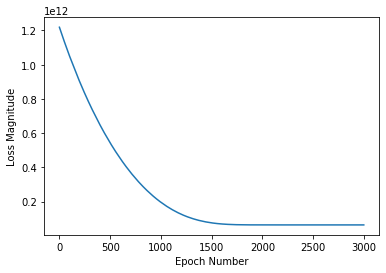

In [69]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [71]:
pd.options.display.float_format = '{:,.2f}'.format


dfTvP = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfTvP

,Actual,Predicted
203,1210000,"1,188,026.88"
115,460000,"461,120.44"
127,1210000,"1,202,363.12"
95,950000,"1,028,705.94"
80,1095000,"1,051,894.25"
76,855800,"706,745.31"
201,1030000,"1,072,588.12"
180,970000,"855,200.69"
2,1190000,"1,115,347.88"
148,495000,"438,445.75"


In [70]:
y_pred = model.predict(X_test)

y_pred = y_pred.reshape((39, ))


In [80]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[726.4079 ],
       [716.206  ],
       [643.67505],
       [680.1876 ],
       [700.3354 ],
       [935.56146],
       [124.1011 ]], dtype=float32), array([726.74335], dtype=float32)]


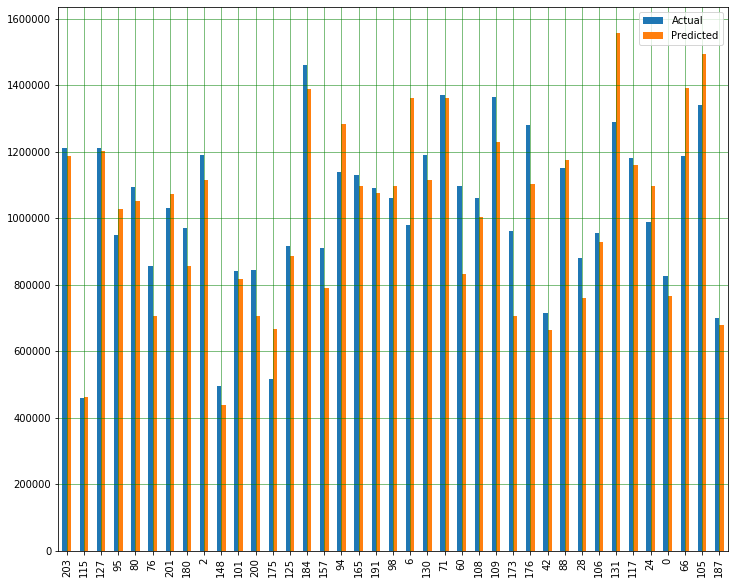

In [72]:
dfTvP.plot(kind='bar',figsize=(12,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test/1000, y_pred/1000))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test/1000, y_pred/1000))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test/1000, y_pred/1000)))


Mean Absolute Error: 96.48097172976763
Mean Squared Error: 16658.318228282744
Root Mean Squared Error: 129.06710746074208


In [74]:
nl0 = tf.keras.layers.Dense(units=4, input_shape=[7])
nl1 = tf.keras.layers.Dense(units=4)
nl2 = tf.keras.layers.Dense(units=1)
model1 = tf.keras.Sequential([nl0, nl1, nl2])
model1.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model1.fit(X_train, y_train, epochs=3000, verbose=True)


Epoch 1/3000
152/152 [==============================] - 0s 1ms/sample - loss: 1210732894100.2107
Epoch 2/3000
152/152 [==============================] - 0s 49us/sample - loss: 1173748045716.2107
Epoch 3/3000
152/152 [==============================] - 0s 48us/sample - loss: 1066731127646.3157
Epoch 4/3000
152/152 [==============================] - 0s 53us/sample - loss: 865449517487.1578
Epoch 5/3000
152/152 [==============================] - 0s 55us/sample - loss: 530943305835.7895
Epoch 6/3000
152/152 [==============================] - 0s 62us/sample - loss: 183830670174.3158
Epoch 7/3000
152/152 [==============================] - 0s 61us/sample - loss: 100071428742.7368
Epoch 8/3000
152/152 [==============================] - 0s 67us/sample - loss: 154263487110.7368
Epoch 9/3000
152/152 [==============================] - 0s 65us/sample - loss: 77056641616.8421
Epoch 10/3000
152/152 [==============================] - 0s 57us/sample - loss: 74251339237.0526
Epoch 11/3000
152/152 [======

152/152 [==============================] - 0s 51us/sample - loss: 63581250667.7895
Epoch 86/3000
152/152 [==============================] - 0s 56us/sample - loss: 63748278164.2105
Epoch 87/3000
152/152 [==============================] - 0s 48us/sample - loss: 64140886501.0526
Epoch 88/3000
152/152 [==============================] - 0s 60us/sample - loss: 64219439696.8421
Epoch 89/3000
152/152 [==============================] - 0s 56us/sample - loss: 63561628079.1579
Epoch 90/3000
152/152 [==============================] - 0s 58us/sample - loss: 63963813995.7895
Epoch 91/3000
152/152 [==============================] - 0s 49us/sample - loss: 64433519346.5263
Epoch 92/3000
152/152 [==============================] - 0s 60us/sample - loss: 63658408259.3684
Epoch 93/3000
152/152 [==============================] - 0s 49us/sample - loss: 64922932924.6316
Epoch 94/3000
152/152 [==============================] - 0s 58us/sample - loss: 65073122034.5263
Epoch 95/3000
152/152 [=====================

152/152 [==============================] - 0s 63us/sample - loss: 66559591909.0526
Epoch 169/3000
152/152 [==============================] - 0s 43us/sample - loss: 63302802162.5263
Epoch 170/3000
152/152 [==============================] - 0s 59us/sample - loss: 64670077143.5789
Epoch 171/3000
152/152 [==============================] - 0s 48us/sample - loss: 63222166150.7368
Epoch 172/3000
152/152 [==============================] - 0s 55us/sample - loss: 63690583902.3158
Epoch 173/3000
152/152 [==============================] - 0s 64us/sample - loss: 63486563759.1579
Epoch 174/3000
152/152 [==============================] - 0s 50us/sample - loss: 63358450957.4737
Epoch 175/3000
152/152 [==============================] - 0s 62us/sample - loss: 63867286743.5789
Epoch 176/3000
152/152 [==============================] - 0s 51us/sample - loss: 64205971024.8421
Epoch 177/3000
152/152 [==============================] - 0s 61us/sample - loss: 65649517352.4211
Epoch 178/3000
152/152 [===========

152/152 [==============================] - 0s 48us/sample - loss: 61939423124.2105
Epoch 252/3000
152/152 [==============================] - 0s 47us/sample - loss: 65550255966.3158
Epoch 253/3000
152/152 [==============================] - 0s 47us/sample - loss: 62774451307.7895
Epoch 254/3000
152/152 [==============================] - 0s 44us/sample - loss: 64372023565.4737
Epoch 255/3000
152/152 [==============================] - 0s 55us/sample - loss: 62903244853.8947
Epoch 256/3000
152/152 [==============================] - 0s 43us/sample - loss: 63246818950.7368
Epoch 257/3000
152/152 [==============================] - 0s 59us/sample - loss: 63166076928.0000
Epoch 258/3000
152/152 [==============================] - 0s 42us/sample - loss: 62787178819.3684
Epoch 259/3000
152/152 [==============================] - 0s 51us/sample - loss: 64181712033.6842
Epoch 260/3000
152/152 [==============================] - 0s 46us/sample - loss: 62411803162.9474
Epoch 261/3000
152/152 [===========

152/152 [==============================] - 0s 43us/sample - loss: 64947931890.5263
Epoch 335/3000
152/152 [==============================] - 0s 51us/sample - loss: 63381151744.0000
Epoch 336/3000
152/152 [==============================] - 0s 47us/sample - loss: 62501928421.0526
Epoch 337/3000
152/152 [==============================] - 0s 52us/sample - loss: 62955721566.3158
Epoch 338/3000
152/152 [==============================] - 0s 51us/sample - loss: 62725848602.9474
Epoch 339/3000
152/152 [==============================] - 0s 43us/sample - loss: 63554779082.1053
Epoch 340/3000
152/152 [==============================] - 0s 52us/sample - loss: 63407530199.5789
Epoch 341/3000
152/152 [==============================] - 0s 36us/sample - loss: 62863033397.8947
Epoch 342/3000
152/152 [==============================] - 0s 58us/sample - loss: 62568335898.9474
Epoch 343/3000
152/152 [==============================] - 0s 50us/sample - loss: 63907270709.8947
Epoch 344/3000
152/152 [===========

152/152 [==============================] - 0s 54us/sample - loss: 65484528693.8947
Epoch 418/3000
152/152 [==============================] - 0s 51us/sample - loss: 62943702608.8421
Epoch 419/3000
152/152 [==============================] - 0s 51us/sample - loss: 65093503514.9474
Epoch 420/3000
152/152 [==============================] - 0s 43us/sample - loss: 63365138539.7895
Epoch 421/3000
152/152 [==============================] - 0s 61us/sample - loss: 62980831070.3158
Epoch 422/3000
152/152 [==============================] - 0s 55us/sample - loss: 63709656117.8947
Epoch 423/3000
152/152 [==============================] - 0s 43us/sample - loss: 62261336818.5263
Epoch 424/3000
152/152 [==============================] - 0s 55us/sample - loss: 63107010344.4211
Epoch 425/3000
152/152 [==============================] - 0s 47us/sample - loss: 64964572860.6316
Epoch 426/3000
152/152 [==============================] - 0s 61us/sample - loss: 65041252459.7895
Epoch 427/3000
152/152 [===========

152/152 [==============================] - 0s 44us/sample - loss: 64068308075.7895
Epoch 501/3000
152/152 [==============================] - 0s 41us/sample - loss: 62798643415.5789
Epoch 502/3000
152/152 [==============================] - 0s 47us/sample - loss: 64027300244.2105
Epoch 503/3000
152/152 [==============================] - 0s 53us/sample - loss: 61980776070.7368
Epoch 504/3000
152/152 [==============================] - 0s 47us/sample - loss: 63897294524.6316
Epoch 505/3000
152/152 [==============================] - 0s 51us/sample - loss: 61748834304.0000
Epoch 506/3000
152/152 [==============================] - 0s 37us/sample - loss: 64430233600.0000
Epoch 507/3000
152/152 [==============================] - 0s 41us/sample - loss: 62754555472.8421
Epoch 508/3000
152/152 [==============================] - 0s 55us/sample - loss: 62877612247.5789
Epoch 509/3000
152/152 [==============================] - ETA: 0s - loss: 13505465344.000 - 0s 80us/sample - loss: 63660306539.7895
E

152/152 [==============================] - 0s 47us/sample - loss: 64666651863.5789
Epoch 584/3000
152/152 [==============================] - 0s 50us/sample - loss: 66570772695.5789
Epoch 585/3000
152/152 [==============================] - 0s 47us/sample - loss: 67279141834.1053
Epoch 586/3000
152/152 [==============================] - 0s 47us/sample - loss: 63922561293.4737
Epoch 587/3000
152/152 [==============================] - 0s 44us/sample - loss: 63244791861.8947
Epoch 588/3000
152/152 [==============================] - 0s 39us/sample - loss: 61963149797.0526
Epoch 589/3000
152/152 [==============================] - 0s 46us/sample - loss: 62438574834.5263
Epoch 590/3000
152/152 [==============================] - 0s 47us/sample - loss: 61831823629.4737
Epoch 591/3000
152/152 [==============================] - 0s 53us/sample - loss: 62338317527.5789
Epoch 592/3000
152/152 [==============================] - 0s 38us/sample - loss: 61697584666.9474
Epoch 593/3000
152/152 [===========

152/152 [==============================] - 0s 36us/sample - loss: 62732774076.6316
Epoch 667/3000
152/152 [==============================] - 0s 36us/sample - loss: 62382566669.4737
Epoch 668/3000
152/152 [==============================] - 0s 34us/sample - loss: 62902297168.8421
Epoch 669/3000
152/152 [==============================] - 0s 36us/sample - loss: 62171044594.5263
Epoch 670/3000
152/152 [==============================] - 0s 33us/sample - loss: 64697999898.9474
Epoch 671/3000
152/152 [==============================] - 0s 38us/sample - loss: 64399902288.8421
Epoch 672/3000
152/152 [==============================] - 0s 38us/sample - loss: 64538246305.6842
Epoch 673/3000
152/152 [==============================] - 0s 38us/sample - loss: 64390226351.1579
Epoch 674/3000
152/152 [==============================] - 0s 42us/sample - loss: 61923740456.4211
Epoch 675/3000
152/152 [==============================] - 0s 42us/sample - loss: 62077357379.3684
Epoch 676/3000
152/152 [===========

152/152 [==============================] - 0s 42us/sample - loss: 62292450250.1053
Epoch 750/3000
152/152 [==============================] - 0s 42us/sample - loss: 61606658371.3684
Epoch 751/3000
152/152 [==============================] - 0s 43us/sample - loss: 61862609812.2105
Epoch 752/3000
152/152 [==============================] - 0s 43us/sample - loss: 61725924837.0526
Epoch 753/3000
152/152 [==============================] - 0s 48us/sample - loss: 62797440107.7895
Epoch 754/3000
152/152 [==============================] - 0s 54us/sample - loss: 60745591430.7368
Epoch 755/3000
152/152 [==============================] - 0s 45us/sample - loss: 63007211897.2632
Epoch 756/3000
152/152 [==============================] - 0s 36us/sample - loss: 62395950780.6316
Epoch 757/3000
152/152 [==============================] - 0s 41us/sample - loss: 61810413945.2632
Epoch 758/3000
152/152 [==============================] - 0s 40us/sample - loss: 62813250937.2632
Epoch 759/3000
152/152 [===========

152/152 [==============================] - 0s 38us/sample - loss: 64382708789.8947
Epoch 833/3000
152/152 [==============================] - 0s 39us/sample - loss: 62004754701.4737
Epoch 834/3000
152/152 [==============================] - 0s 35us/sample - loss: 62525540890.9474
Epoch 835/3000
152/152 [==============================] - 0s 37us/sample - loss: 61622847865.2632
Epoch 836/3000
152/152 [==============================] - 0s 40us/sample - loss: 61110243112.4211
Epoch 837/3000
152/152 [==============================] - 0s 41us/sample - loss: 62273118315.7895
Epoch 838/3000
152/152 [==============================] - 0s 49us/sample - loss: 61423221490.5263
Epoch 839/3000
152/152 [==============================] - 0s 56us/sample - loss: 62912392515.3684
Epoch 840/3000
152/152 [==============================] - 0s 50us/sample - loss: 63333125551.1579
Epoch 841/3000
152/152 [==============================] - 0s 50us/sample - loss: 61878392185.2632
Epoch 842/3000
152/152 [===========

152/152 [==============================] - 0s 36us/sample - loss: 61353500941.4737
Epoch 916/3000
152/152 [==============================] - 0s 38us/sample - loss: 60859440882.5263
Epoch 917/3000
152/152 [==============================] - 0s 41us/sample - loss: 62002523513.2632
Epoch 918/3000
152/152 [==============================] - 0s 39us/sample - loss: 64448803570.5263
Epoch 919/3000
152/152 [==============================] - 0s 36us/sample - loss: 60785489273.2632
Epoch 920/3000
152/152 [==============================] - 0s 37us/sample - loss: 63103203947.7895
Epoch 921/3000
152/152 [==============================] - 0s 36us/sample - loss: 61203974790.7368
Epoch 922/3000
152/152 [==============================] - 0s 37us/sample - loss: 61294831077.0526
Epoch 923/3000
152/152 [==============================] - 0s 34us/sample - loss: 61379670231.5789
Epoch 924/3000
152/152 [==============================] - 0s 38us/sample - loss: 61469291573.8947
Epoch 925/3000
152/152 [===========

152/152 [==============================] - 0s 36us/sample - loss: 61406554165.8947
Epoch 999/3000
152/152 [==============================] - 0s 37us/sample - loss: 60939981015.5789
Epoch 1000/3000
152/152 [==============================] - 0s 40us/sample - loss: 61184308277.8947
Epoch 1001/3000
152/152 [==============================] - 0s 40us/sample - loss: 61308715978.1053
Epoch 1002/3000
152/152 [==============================] - 0s 37us/sample - loss: 60893837904.8421
Epoch 1003/3000
152/152 [==============================] - 0s 36us/sample - loss: 62053149480.4211
Epoch 1004/3000
152/152 [==============================] - 0s 36us/sample - loss: 61595977889.6842
Epoch 1005/3000
152/152 [==============================] - 0s 37us/sample - loss: 60519401660.6316
Epoch 1006/3000
152/152 [==============================] - 0s 34us/sample - loss: 62827428702.3158
Epoch 1007/3000
152/152 [==============================] - 0s 35us/sample - loss: 61522683796.2105
Epoch 1008/3000
152/152 [==

Epoch 1081/3000
152/152 [==============================] - 0s 34us/sample - loss: 62758007861.8947
Epoch 1082/3000
152/152 [==============================] - 0s 36us/sample - loss: 60936288741.0526
Epoch 1083/3000
152/152 [==============================] - 0s 35us/sample - loss: 61922099415.5789
Epoch 1084/3000
152/152 [==============================] - 0s 38us/sample - loss: 62882652160.0000
Epoch 1085/3000
152/152 [==============================] - 0s 59us/sample - loss: 60002087127.5789
Epoch 1086/3000
152/152 [==============================] - 0s 49us/sample - loss: 62545225620.2105
Epoch 1087/3000
152/152 [==============================] - 0s 57us/sample - loss: 65667804213.8947
Epoch 1088/3000
152/152 [==============================] - 0s 60us/sample - loss: 64527242293.8947
Epoch 1089/3000
152/152 [==============================] - 0s 98us/sample - loss: 63214299890.5263
Epoch 1090/3000
152/152 [==============================] - 0s 100us/sample - loss: 62536477857.6842
Epoch 109

152/152 [==============================] - 0s 39us/sample - loss: 61344214878.3158
Epoch 1164/3000
152/152 [==============================] - 0s 43us/sample - loss: 60929310935.5789
Epoch 1165/3000
152/152 [==============================] - 0s 44us/sample - loss: 60477989052.6316
Epoch 1166/3000
152/152 [==============================] - 0s 48us/sample - loss: 60719845807.1579
Epoch 1167/3000
152/152 [==============================] - 0s 48us/sample - loss: 60519317072.8421
Epoch 1168/3000
152/152 [==============================] - 0s 49us/sample - loss: 61168178472.4211
Epoch 1169/3000
152/152 [==============================] - 0s 65us/sample - loss: 63090940604.6316
Epoch 1170/3000
152/152 [==============================] - 0s 48us/sample - loss: 60092260783.1579
Epoch 1171/3000
152/152 [==============================] - 0s 45us/sample - loss: 62016603836.6316
Epoch 1172/3000
152/152 [==============================] - 0s 50us/sample - loss: 60755082401.6842
Epoch 1173/3000
152/152 [=

152/152 [==============================] - 0s 67us/sample - loss: 61885685005.4737
Epoch 1246/3000
152/152 [==============================] - 0s 62us/sample - loss: 63272943292.6316
Epoch 1247/3000
152/152 [==============================] - 0s 41us/sample - loss: 60077767248.8421
Epoch 1248/3000
152/152 [==============================] - 0s 69us/sample - loss: 61400446760.4211
Epoch 1249/3000
152/152 [==============================] - 0s 70us/sample - loss: 61551165224.4211
Epoch 1250/3000
152/152 [==============================] - 0s 73us/sample - loss: 59648269258.1053
Epoch 1251/3000
152/152 [==============================] - 0s 65us/sample - loss: 62673292665.2632
Epoch 1252/3000
152/152 [==============================] - 0s 62us/sample - loss: 60044058192.8421
Epoch 1253/3000
152/152 [==============================] - 0s 62us/sample - loss: 61398954630.7368
Epoch 1254/3000
152/152 [==============================] - 0s 59us/sample - loss: 65310356264.4211
Epoch 1255/3000
152/152 [=

152/152 [==============================] - 0s 37us/sample - loss: 59897632282.9474
Epoch 1328/3000
152/152 [==============================] - 0s 48us/sample - loss: 60728714725.0526
Epoch 1329/3000
152/152 [==============================] - 0s 50us/sample - loss: 60665027961.2632
Epoch 1330/3000
152/152 [==============================] - 0s 34us/sample - loss: 61469529950.3158
Epoch 1331/3000
152/152 [==============================] - 0s 37us/sample - loss: 59708662730.1053
Epoch 1332/3000
152/152 [==============================] - 0s 39us/sample - loss: 62113333032.4211
Epoch 1333/3000
152/152 [==============================] - 0s 42us/sample - loss: 60652878255.1579
Epoch 1334/3000
152/152 [==============================] - 0s 39us/sample - loss: 62072929441.6842
Epoch 1335/3000
152/152 [==============================] - 0s 35us/sample - loss: 62659768320.0000
Epoch 1336/3000
152/152 [==============================] - 0s 35us/sample - loss: 62274931873.6842
Epoch 1337/3000
152/152 [=

152/152 [==============================] - 0s 36us/sample - loss: 62816589446.7368
Epoch 1410/3000
152/152 [==============================] - 0s 36us/sample - loss: 59127415861.8947
Epoch 1411/3000
152/152 [==============================] - 0s 35us/sample - loss: 63875703592.4211
Epoch 1412/3000
152/152 [==============================] - 0s 36us/sample - loss: 62145798144.0000
Epoch 1413/3000
152/152 [==============================] - 0s 35us/sample - loss: 62341253227.7895
Epoch 1414/3000
152/152 [==============================] - 0s 35us/sample - loss: 60181159504.8421
Epoch 1415/3000
152/152 [==============================] - 0s 36us/sample - loss: 62038894699.7895
Epoch 1416/3000
152/152 [==============================] - 0s 34us/sample - loss: 61354079178.1053
Epoch 1417/3000
152/152 [==============================] - 0s 38us/sample - loss: 61551132025.2632
Epoch 1418/3000
152/152 [==============================] - 0s 39us/sample - loss: 60864085423.1579
Epoch 1419/3000
152/152 [=

152/152 [==============================] - 0s 38us/sample - loss: 63080606019.3684
Epoch 1492/3000
152/152 [==============================] - 0s 36us/sample - loss: 59384497529.2632
Epoch 1493/3000
152/152 [==============================] - 0s 36us/sample - loss: 64365482630.7368
Epoch 1494/3000
152/152 [==============================] - 0s 37us/sample - loss: 61206592889.2632
Epoch 1495/3000
152/152 [==============================] - 0s 36us/sample - loss: 61022174962.5263
Epoch 1496/3000
152/152 [==============================] - 0s 36us/sample - loss: 60349539435.7895
Epoch 1497/3000
152/152 [==============================] - 0s 38us/sample - loss: 61693023285.8947
Epoch 1498/3000
152/152 [==============================] - 0s 39us/sample - loss: 59449293985.6842
Epoch 1499/3000
152/152 [==============================] - 0s 40us/sample - loss: 60971482597.0526
Epoch 1500/3000
152/152 [==============================] - 0s 38us/sample - loss: 60672031474.5263
Epoch 1501/3000
152/152 [=

152/152 [==============================] - 0s 41us/sample - loss: 61155811866.9474
Epoch 1574/3000
152/152 [==============================] - 0s 38us/sample - loss: 60422249957.0526
Epoch 1575/3000
152/152 [==============================] - 0s 35us/sample - loss: 60095947452.6316
Epoch 1576/3000
152/152 [==============================] - 0s 35us/sample - loss: 60747483243.7895
Epoch 1577/3000
152/152 [==============================] - 0s 36us/sample - loss: 61280993926.7368
Epoch 1578/3000
152/152 [==============================] - 0s 36us/sample - loss: 59679904390.7368
Epoch 1579/3000
152/152 [==============================] - 0s 44us/sample - loss: 60462831077.0526
Epoch 1580/3000
152/152 [==============================] - 0s 35us/sample - loss: 60364301096.4211
Epoch 1581/3000
152/152 [==============================] - 0s 35us/sample - loss: 60138620712.4211
Epoch 1582/3000
152/152 [==============================] - 0s 36us/sample - loss: 59779256535.5789
Epoch 1583/3000
152/152 [=

152/152 [==============================] - 0s 37us/sample - loss: 60259882684.6316
Epoch 1656/3000
152/152 [==============================] - 0s 35us/sample - loss: 60068810698.1053
Epoch 1657/3000
152/152 [==============================] - 0s 36us/sample - loss: 61693453150.3158
Epoch 1658/3000
152/152 [==============================] - 0s 34us/sample - loss: 64668904717.4737
Epoch 1659/3000
152/152 [==============================] - 0s 35us/sample - loss: 57863092439.5789
Epoch 1660/3000
152/152 [==============================] - 0s 34us/sample - loss: 63189382898.5263
Epoch 1661/3000
152/152 [==============================] - 0s 38us/sample - loss: 61208607366.7368
Epoch 1662/3000
152/152 [==============================] - 0s 39us/sample - loss: 59535653349.0526
Epoch 1663/3000
152/152 [==============================] - 0s 38us/sample - loss: 59971867486.3158
Epoch 1664/3000
152/152 [==============================] - 0s 39us/sample - loss: 61837183514.9474
Epoch 1665/3000
152/152 [=

Epoch 1738/3000
152/152 [==============================] - 0s 38us/sample - loss: 61233222332.6316
Epoch 1739/3000
152/152 [==============================] - 0s 35us/sample - loss: 63010672693.8947
Epoch 1740/3000
152/152 [==============================] - 0s 35us/sample - loss: 59457349146.9474
Epoch 1741/3000
152/152 [==============================] - 0s 36us/sample - loss: 60816924725.8947
Epoch 1742/3000
152/152 [==============================] - 0s 37us/sample - loss: 62100272720.8421
Epoch 1743/3000
152/152 [==============================] - 0s 38us/sample - loss: 61510643927.5789
Epoch 1744/3000
152/152 [==============================] - 0s 37us/sample - loss: 58896433960.4211
Epoch 1745/3000
152/152 [==============================] - 0s 34us/sample - loss: 61648130048.0000
Epoch 1746/3000
152/152 [==============================] - 0s 38us/sample - loss: 60247647878.7368
Epoch 1747/3000
152/152 [==============================] - 0s 36us/sample - loss: 60175116072.4211
Epoch 1748

152/152 [==============================] - 0s 37us/sample - loss: 61082808697.2632
Epoch 1821/3000
152/152 [==============================] - 0s 46us/sample - loss: 59720221318.7368
Epoch 1822/3000
152/152 [==============================] - 0s 36us/sample - loss: 61758160087.5789
Epoch 1823/3000
152/152 [==============================] - 0s 38us/sample - loss: 58800084776.4211
Epoch 1824/3000
152/152 [==============================] - 0s 37us/sample - loss: 61012445992.4211
Epoch 1825/3000
152/152 [==============================] - 0s 42us/sample - loss: 59435233872.8421
Epoch 1826/3000
152/152 [==============================] - 0s 35us/sample - loss: 59914665606.7368
Epoch 1827/3000
152/152 [==============================] - 0s 34us/sample - loss: 59770945320.4211
Epoch 1828/3000
152/152 [==============================] - 0s 35us/sample - loss: 61495928939.7895
Epoch 1829/3000
152/152 [==============================] - 0s 37us/sample - loss: 64807469163.7895
Epoch 1830/3000
152/152 [=

152/152 [==============================] - 0s 37us/sample - loss: 59597591983.1579
Epoch 1903/3000
152/152 [==============================] - 0s 40us/sample - loss: 59765958871.5789
Epoch 1904/3000
152/152 [==============================] - 0s 40us/sample - loss: 59960952454.7368
Epoch 1905/3000
152/152 [==============================] - 0s 38us/sample - loss: 59939778560.0000
Epoch 1906/3000
152/152 [==============================] - 0s 40us/sample - loss: 59665932907.7895
Epoch 1907/3000
152/152 [==============================] - 0s 39us/sample - loss: 60963523098.9474
Epoch 1908/3000
152/152 [==============================] - 0s 37us/sample - loss: 61217929970.5263
Epoch 1909/3000
152/152 [==============================] - 0s 39us/sample - loss: 59276228931.3684
Epoch 1910/3000
152/152 [==============================] - 0s 39us/sample - loss: 62344103666.5263
Epoch 1911/3000
152/152 [==============================] - 0s 36us/sample - loss: 59085140237.4737
Epoch 1912/3000
152/152 [=

152/152 [==============================] - 0s 35us/sample - loss: 60777158494.3158
Epoch 1985/3000
152/152 [==============================] - 0s 38us/sample - loss: 60564045824.0000
Epoch 1986/3000
152/152 [==============================] - 0s 35us/sample - loss: 61720137296.8421
Epoch 1987/3000
152/152 [==============================] - 0s 39us/sample - loss: 59094941318.7368
Epoch 1988/3000
152/152 [==============================] - 0s 44us/sample - loss: 59988840232.4211
Epoch 1989/3000
152/152 [==============================] - 0s 39us/sample - loss: 61301580476.6316
Epoch 1990/3000
152/152 [==============================] - 0s 35us/sample - loss: 59443996779.7895
Epoch 1991/3000
152/152 [==============================] - 0s 34us/sample - loss: 59915957301.8947
Epoch 1992/3000
152/152 [==============================] - 0s 35us/sample - loss: 60045248727.5789
Epoch 1993/3000
152/152 [==============================] - 0s 34us/sample - loss: 58902514984.4211
Epoch 1994/3000
152/152 [=

152/152 [==============================] - 0s 35us/sample - loss: 60395530347.7895
Epoch 2067/3000
152/152 [==============================] - 0s 37us/sample - loss: 59271357332.2105
Epoch 2068/3000
152/152 [==============================] - 0s 38us/sample - loss: 61450858496.0000
Epoch 2069/3000
152/152 [==============================] - 0s 44us/sample - loss: 59248909204.2105
Epoch 2070/3000
152/152 [==============================] - 0s 34us/sample - loss: 59681833822.3158
Epoch 2071/3000
152/152 [==============================] - 0s 36us/sample - loss: 62965326416.8421
Epoch 2072/3000
152/152 [==============================] - 0s 37us/sample - loss: 58623483284.2105
Epoch 2073/3000
152/152 [==============================] - 0s 38us/sample - loss: 60488958167.5789
Epoch 2074/3000
152/152 [==============================] - 0s 33us/sample - loss: 59660756938.1053
Epoch 2075/3000
152/152 [==============================] - 0s 34us/sample - loss: 59845296424.4211
Epoch 2076/3000
152/152 [=

152/152 [==============================] - 0s 38us/sample - loss: 59660722876.6316
Epoch 2149/3000
152/152 [==============================] - 0s 39us/sample - loss: 59206209805.4737
Epoch 2150/3000
152/152 [==============================] - 0s 37us/sample - loss: 59772399292.6316
Epoch 2151/3000
152/152 [==============================] - 0s 38us/sample - loss: 59422670794.1053
Epoch 2152/3000
152/152 [==============================] - 0s 38us/sample - loss: 59246932506.9474
Epoch 2153/3000
152/152 [==============================] - 0s 39us/sample - loss: 59389429625.2632
Epoch 2154/3000
152/152 [==============================] - 0s 36us/sample - loss: 59367999110.7368
Epoch 2155/3000
152/152 [==============================] - 0s 37us/sample - loss: 59569115567.1579
Epoch 2156/3000
152/152 [==============================] - 0s 35us/sample - loss: 60405767329.6842
Epoch 2157/3000
152/152 [==============================] - 0s 39us/sample - loss: 58801202176.0000
Epoch 2158/3000
152/152 [=

152/152 [==============================] - 0s 35us/sample - loss: 60098743673.2632
Epoch 2231/3000
152/152 [==============================] - 0s 39us/sample - loss: 60348873674.1053
Epoch 2232/3000
152/152 [==============================] - 0s 35us/sample - loss: 59613385135.1579
Epoch 2233/3000
152/152 [==============================] - 0s 36us/sample - loss: 59857672946.5263
Epoch 2234/3000
152/152 [==============================] - 0s 37us/sample - loss: 59202593253.0526
Epoch 2235/3000
152/152 [==============================] - 0s 38us/sample - loss: 59843640212.2105
Epoch 2236/3000
152/152 [==============================] - 0s 38us/sample - loss: 58798265505.6842
Epoch 2237/3000
152/152 [==============================] - 0s 40us/sample - loss: 60420563213.4737
Epoch 2238/3000
152/152 [==============================] - 0s 35us/sample - loss: 61711572722.5263
Epoch 2239/3000
152/152 [==============================] - 0s 35us/sample - loss: 58560514155.7895
Epoch 2240/3000
152/152 [=

152/152 [==============================] - 0s 36us/sample - loss: 59657693722.9474
Epoch 2313/3000
152/152 [==============================] - 0s 36us/sample - loss: 59686453679.1579
Epoch 2314/3000
152/152 [==============================] - 0s 35us/sample - loss: 59812058974.3158
Epoch 2315/3000
152/152 [==============================] - 0s 35us/sample - loss: 60105502612.2105
Epoch 2316/3000
152/152 [==============================] - 0s 35us/sample - loss: 58883334359.5789
Epoch 2317/3000
152/152 [==============================] - 0s 34us/sample - loss: 62429578293.8947
Epoch 2318/3000
152/152 [==============================] - 0s 37us/sample - loss: 60901700661.8947
Epoch 2319/3000
152/152 [==============================] - 0s 35us/sample - loss: 59795274320.8421
Epoch 2320/3000
152/152 [==============================] - 0s 38us/sample - loss: 60299424175.1579
Epoch 2321/3000
152/152 [==============================] - 0s 38us/sample - loss: 59936338351.1579
Epoch 2322/3000
152/152 [=

152/152 [==============================] - 0s 40us/sample - loss: 59905595607.5789
Epoch 2395/3000
152/152 [==============================] - 0s 43us/sample - loss: 61017284608.0000
Epoch 2396/3000
152/152 [==============================] - 0s 42us/sample - loss: 61807695656.4211
Epoch 2397/3000
152/152 [==============================] - 0s 36us/sample - loss: 61012088805.0526
Epoch 2398/3000
152/152 [==============================] - 0s 34us/sample - loss: 60169633953.6842
Epoch 2399/3000
152/152 [==============================] - 0s 39us/sample - loss: 60535782992.8421
Epoch 2400/3000
152/152 [==============================] - 0s 36us/sample - loss: 60057466341.0526
Epoch 2401/3000
152/152 [==============================] - 0s 34us/sample - loss: 59311984855.5789
Epoch 2402/3000
152/152 [==============================] - 0s 41us/sample - loss: 59636861493.8947
Epoch 2403/3000
152/152 [==============================] - 0s 42us/sample - loss: 60850703521.6842
Epoch 2404/3000
152/152 [=

152/152 [==============================] - 0s 37us/sample - loss: 62461892985.2632
Epoch 2477/3000
152/152 [==============================] - 0s 42us/sample - loss: 58011640832.0000
Epoch 2478/3000
152/152 [==============================] - 0s 35us/sample - loss: 61664067098.9474
Epoch 2479/3000
152/152 [==============================] - 0s 39us/sample - loss: 59125651348.2105
Epoch 2480/3000
152/152 [==============================] - 0s 48us/sample - loss: 59746962162.5263
Epoch 2481/3000
152/152 [==============================] - 0s 46us/sample - loss: 59493566086.7368
Epoch 2482/3000
152/152 [==============================] - 0s 38us/sample - loss: 59655149406.3158
Epoch 2483/3000
152/152 [==============================] - 0s 42us/sample - loss: 60136523398.7368
Epoch 2484/3000
152/152 [==============================] - 0s 40us/sample - loss: 60722527663.1579
Epoch 2485/3000
152/152 [==============================] - 0s 34us/sample - loss: 62126597012.2105
Epoch 2486/3000
152/152 [=

152/152 [==============================] - 0s 36us/sample - loss: 59708501207.5789
Epoch 2559/3000
152/152 [==============================] - 0s 36us/sample - loss: 59502824771.3684
Epoch 2560/3000
152/152 [==============================] - 0s 40us/sample - loss: 59281710241.6842
Epoch 2561/3000
152/152 [==============================] - 0s 36us/sample - loss: 59073954762.1053
Epoch 2562/3000
152/152 [==============================] - 0s 34us/sample - loss: 59265921401.2632
Epoch 2563/3000
152/152 [==============================] - 0s 39us/sample - loss: 59324999518.3158
Epoch 2564/3000
152/152 [==============================] - 0s 41us/sample - loss: 59910566157.4737
Epoch 2565/3000
152/152 [==============================] - 0s 39us/sample - loss: 58836498378.1053
Epoch 2566/3000
152/152 [==============================] - 0s 46us/sample - loss: 59175711312.8421
Epoch 2567/3000
152/152 [==============================] - 0s 49us/sample - loss: 58703102760.4211
Epoch 2568/3000
152/152 [=

152/152 [==============================] - 0s 41us/sample - loss: 59329326430.3158
Epoch 2641/3000
152/152 [==============================] - 0s 43us/sample - loss: 60276831043.3684
Epoch 2642/3000
152/152 [==============================] - 0s 40us/sample - loss: 59803222824.4211
Epoch 2643/3000
152/152 [==============================] - 0s 41us/sample - loss: 59516868284.6316
Epoch 2644/3000
152/152 [==============================] - 0s 41us/sample - loss: 61626406858.1053
Epoch 2645/3000
152/152 [==============================] - 0s 39us/sample - loss: 62947370684.6316
Epoch 2646/3000
152/152 [==============================] - 0s 39us/sample - loss: 59319767902.3158
Epoch 2647/3000
152/152 [==============================] - 0s 39us/sample - loss: 61287779651.3684
Epoch 2648/3000
152/152 [==============================] - 0s 35us/sample - loss: 59917129458.5263
Epoch 2649/3000
152/152 [==============================] - 0s 36us/sample - loss: 60148102251.7895
Epoch 2650/3000
152/152 [=

Epoch 2723/3000
152/152 [==============================] - 0s 35us/sample - loss: 62747115735.5789
Epoch 2724/3000
152/152 [==============================] - 0s 40us/sample - loss: 61539361253.0526
Epoch 2725/3000
152/152 [==============================] - 0s 41us/sample - loss: 62577765537.6842
Epoch 2726/3000
152/152 [==============================] - 0s 40us/sample - loss: 60804330280.4211
Epoch 2727/3000
152/152 [==============================] - 0s 38us/sample - loss: 59724345990.7368
Epoch 2728/3000
152/152 [==============================] - 0s 38us/sample - loss: 59385427914.1053
Epoch 2729/3000
152/152 [==============================] - 0s 39us/sample - loss: 59167305997.4737
Epoch 2730/3000
152/152 [==============================] - 0s 37us/sample - loss: 59111689162.1053
Epoch 2731/3000
152/152 [==============================] - 0s 38us/sample - loss: 59109631461.0526
Epoch 2732/3000
152/152 [==============================] - 0s 42us/sample - loss: 60366656673.6842
Epoch 2733

152/152 [==============================] - 0s 34us/sample - loss: 59388245045.8947
Epoch 2806/3000
152/152 [==============================] - 0s 35us/sample - loss: 59073984404.2105
Epoch 2807/3000
152/152 [==============================] - 0s 36us/sample - loss: 59920660803.3684
Epoch 2808/3000
152/152 [==============================] - 0s 35us/sample - loss: 58844145664.0000
Epoch 2809/3000
152/152 [==============================] - 0s 36us/sample - loss: 59718115489.6842
Epoch 2810/3000
152/152 [==============================] - 0s 33us/sample - loss: 59874508584.4211
Epoch 2811/3000
152/152 [==============================] - 0s 34us/sample - loss: 59393472404.2105
Epoch 2812/3000
152/152 [==============================] - 0s 39us/sample - loss: 59557552020.2105
Epoch 2813/3000
152/152 [==============================] - 0s 38us/sample - loss: 58852648744.4211
Epoch 2814/3000
152/152 [==============================] - 0s 36us/sample - loss: 61708278945.6842
Epoch 2815/3000
152/152 [=

152/152 [==============================] - 0s 40us/sample - loss: 59548165389.4737
Epoch 2888/3000
152/152 [==============================] - 0s 37us/sample - loss: 58850363445.8947
Epoch 2889/3000
152/152 [==============================] - 0s 34us/sample - loss: 60385930671.1579
Epoch 2890/3000
152/152 [==============================] - 0s 39us/sample - loss: 59209860473.2632
Epoch 2891/3000
152/152 [==============================] - 0s 38us/sample - loss: 59359283361.6842
Epoch 2892/3000
152/152 [==============================] - 0s 37us/sample - loss: 59304524961.6842
Epoch 2893/3000
152/152 [==============================] - 0s 37us/sample - loss: 59743384629.8947
Epoch 2894/3000
152/152 [==============================] - 0s 39us/sample - loss: 59450570590.3158
Epoch 2895/3000
152/152 [==============================] - 0s 37us/sample - loss: 59914796247.5789
Epoch 2896/3000
152/152 [==============================] - 0s 38us/sample - loss: 59415318312.4211
Epoch 2897/3000
152/152 [=

152/152 [==============================] - 0s 37us/sample - loss: 60105424033.6842
Epoch 2970/3000
152/152 [==============================] - 0s 35us/sample - loss: 61243233711.1579
Epoch 2971/3000
152/152 [==============================] - 0s 35us/sample - loss: 58444571378.5263
Epoch 2972/3000
152/152 [==============================] - 0s 34us/sample - loss: 59781648653.4737
Epoch 2973/3000
152/152 [==============================] - 0s 35us/sample - loss: 58739118080.0000
Epoch 2974/3000
152/152 [==============================] - 0s 39us/sample - loss: 60653153172.2105
Epoch 2975/3000
152/152 [==============================] - 0s 38us/sample - loss: 59662382133.8947
Epoch 2976/3000
152/152 [==============================] - 0s 36us/sample - loss: 58928307361.6842
Epoch 2977/3000
152/152 [==============================] - 0s 38us/sample - loss: 59573408983.5789
Epoch 2978/3000
152/152 [==============================] - 0s 43us/sample - loss: 58954819260.6316
Epoch 2979/3000
152/152 [=

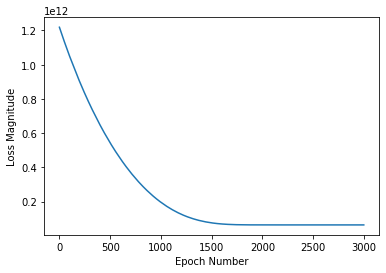

In [75]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [76]:
y_pred1 = model1.predict(X_test)

y_pred1 = y_pred1.reshape((39, ))


In [77]:
pd.options.display.float_format = '{:,.2f}'.format


dfTvP1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
dfTvP1

,Actual,Predicted
203,1210000,"1,215,268.88"
115,460000,"449,955.25"
127,1210000,"1,265,659.00"
95,950000,"911,562.75"
80,1095000,"1,015,608.25"
76,855800,"729,807.00"
201,1030000,"1,020,827.75"
180,970000,"941,551.50"
2,1190000,"1,172,993.38"
148,495000,"443,066.25"


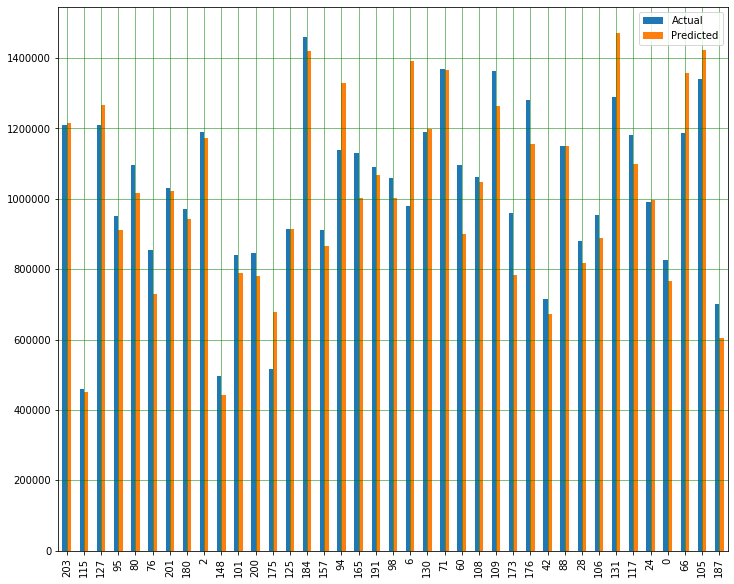

In [78]:
dfTvP1.plot(kind='bar',figsize=(12,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [79]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test/1000, y_pred1/1000))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test/1000, y_pred1/1000))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test/1000, y_pred1/1000)))


Mean Absolute Error: 78.48675833208134
Mean Squared Error: 12450.739458759133
Root Mean Squared Error: 111.58288156683862
